# **Data Preprocessing**
**1 Handling Missing Values**

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/ecom-user-churn-data.csv')

# Check the number of missing values before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Initialize imputer for numerical features
numerical_imputer = SimpleImputer(strategy='median')

# Identify numerical columns and apply imputation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Check the number of missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Optionally, print the first few rows of the dataframe to inspect
print("\nFirst few rows of the DataFrame after imputation:")
print(df.head())


Missing values before imputation:
visitorid        0
ses_rec          0
ses_rec_avg      0
ses_rec_sd       0
ses_rec_cv       0
user_rec         0
ses_n            0
ses_n_r          0
int_n            0
int_n_r          0
tran_n           0
tran_n_r         0
rev_sum          0
rev_sum_r        0
major_spend_r    0
int_cat_n_avg    0
int_itm_n_avg    0
ses_mo_avg       0
ses_mo_sd        0
ses_ho_avg       0
ses_ho_sd        0
ses_wknd_r       0
ses_len_avg      0
time_to_int      0
time_to_tran     0
int_cat1_n       0
int_cat2_n       0
int_cat3_n       0
int_cat4_n       0
int_cat5_n       0
int_cat6_n       0
int_cat7_n       0
int_cat8_n       0
int_cat9_n       0
int_cat10_n      0
int_cat11_n      0
int_cat12_n      0
int_cat13_n      0
int_cat15_n      0
int_cat16_n      0
int_cat17_n      0
int_cat18_n      0
int_cat19_n      0
int_cat20_n      0
int_cat21_n      0
int_cat22_n      0
int_cat23_n      0
int_cat24_n      0
target_class     0
dtype: int64

Missing values after 

**2 Scaling Numerical Features**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/ecom-user-churn-data.csv')


# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show the first few rows of the DataFrame after imputation and scaling
print("\nFirst few rows of the DataFrame after imputation and scaling:")
print(df.head())

# Optionally, display the summary statistics to check scaling results
print("\nSummary statistics after scaling:")
print(df[numerical_columns].describe())



First few rows of the DataFrame after imputation and scaling:
   visitorid   ses_rec  ses_rec_avg  ses_rec_sd  ses_rec_cv  user_rec  \
0  -1.736738  0.821506     0.262539   -0.411911    0.021903  0.205134   
1  -1.736340  0.821506     2.740164   -0.411911    0.021903  2.027822   
2  -1.736294 -0.158401    -0.612888   -0.366345    3.290976 -0.508092   
3  -1.736225 -0.485036     0.097365   -0.411911    0.021903 -0.389221   
4  -1.735793  0.059356     0.813123   -0.411911    0.021903  0.363628   

      ses_n   ses_n_r     int_n   int_n_r  ...  int_cat16_n  int_cat17_n  \
0 -0.185143 -0.324977 -0.096455 -0.151782  ...    -0.157031    -0.154636   
1 -0.185143 -0.399458 -0.122410 -0.495219  ...    -0.157031    -0.154636   
2  1.034287  0.943177  0.163093 -0.370333  ...    -0.157031    -0.154636   
3 -0.185143 -0.238959 -0.070500  0.191655  ...    -0.157031    -0.154636   
4 -0.185143 -0.337779 -0.122410 -0.495219  ...     0.171557    -0.154636   

   int_cat18_n  int_cat19_n  int_cat20_n 

**3 Encoding Categorical Features**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/ecom-user-churn-data.csv')

# Check if there are any categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# If there are categorical columns, encode them
for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

# Example for encoding a specific target column (if it's non-numeric)
df['target_class'] = LabelEncoder().fit_transform(df['target_class'])

# Check the first few rows of the DataFrame after encoding
print("\nFirst few rows of the DataFrame after encoding:")
print(df.head())



First few rows of the DataFrame after encoding:
   visitorid  ses_rec  ses_rec_avg  ses_rec_sd  ses_rec_cv  user_rec  ses_n  \
0         89     23.0         16.0         0.0         0.0      39.0    2.0   
1        251     23.0         61.0         0.0         0.0      85.0    2.0   
2        270     14.0          0.1         0.3         3.0      21.0   11.0   
3        298     11.0         13.0         0.0         0.0      24.0    2.0   
4        474     16.0         26.0         0.0         0.0      43.0    2.0   

    ses_n_r  int_n   int_n_r  ...  int_cat16_n  int_cat17_n  int_cat18_n  \
0  0.051282    3.0  1.500000  ...            0            0            0   
1  0.023529    2.0  1.000000  ...            0            0            0   
2  0.523810   13.0  1.181818  ...            0            0            0   
3  0.083333    4.0  2.000000  ...            0            0            0   
4  0.046512    2.0  1.000000  ...            2            0            0   

   int_cat19_n  int

# **Feature Engineering**

In [ ]:
import pandas as pd

# Assuming the dataset is already loaded as 'df'

# Check all columns in the dataframe
print("Columns in the dataset:", df.columns)

# Identify the interaction columns (those matching the pattern 'int_cat' followed by a number and '_n')
interaction_columns = [f'int_cat{i}_n' for i in range(1, 25)]

# Filter only the columns that actually exist in the dataframe
existing_interaction_columns = [col for col in interaction_columns if col in df.columns]

# If we found valid columns, sum them to create 'total_int_cat'
if existing_interaction_columns:
    df['total_int_cat'] = df[existing_interaction_columns].sum(axis=1)
else:
    print("No valid interaction columns found.")

# Create variability flag for 'ses_rec_cv' if it exists in the dataframe
if 'ses_rec_cv' in df.columns:
    df['high_variability'] = (df['ses_rec_cv'] > 1).astype(int)
else:
    print("Column 'ses_rec_cv' is missing.")

# Check the first few rows after feature engineering
print("\nFirst few rows after feature engineering:")
print(df[['total_int_cat', 'high_variability']].head())


Columns in the dataset: Index(['visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv',
       'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n',
       'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg',
       'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd',
       'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran',
       'int_cat1_n', 'int_cat2_n', 'int_cat3_n', 'int_cat4_n', 'int_cat5_n',
       'int_cat6_n', 'int_cat7_n', 'int_cat8_n', 'int_cat9_n', 'int_cat10_n',
       'int_cat11_n', 'int_cat12_n', 'int_cat13_n', 'int_cat15_n',
       'int_cat16_n', 'int_cat17_n', 'int_cat18_n', 'int_cat19_n',
       'int_cat20_n', 'int_cat21_n', 'int_cat22_n', 'int_cat23_n',
       'int_cat24_n', 'target_class'],
      dtype='object')

First few rows after feature engineering:
   total_int_cat  high_variability
0              3                 0
1              2                 0
2             13                 1
3          

# **Exploratory Data Analysis (EDA)**

**1. Distribution of target_class**

<ipython-input-61-428b6d348e51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_class', data=df, palette='viridis')


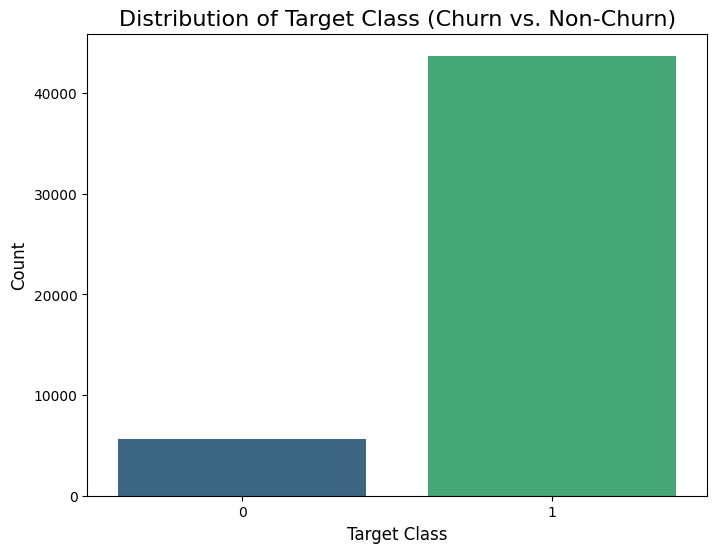

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of 'target_class'
plt.figure(figsize=(8, 6))
sns.countplot(x='target_class', data=df, palette='viridis')
plt.title('Distribution of Target Class (Churn vs. Non-Churn)', fontsize=16)
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


## **2. Correlation Between Features**

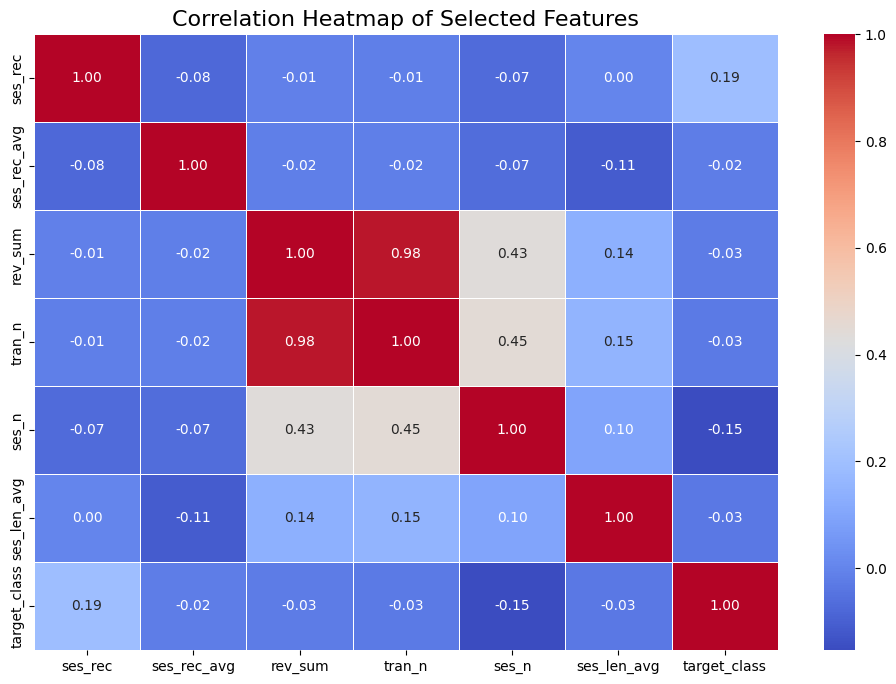

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for correlation analysis
selected_features = [
    'ses_rec', 'ses_rec_avg', 'rev_sum', 'tran_n', 'ses_n', 'ses_len_avg', 'target_class'
]

# Compute the correlation matrix
correlation_matrix = df[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
plt.show()


**3. Influence of Metrics like ses_rec_avg or rev_sum on Churn**

<ipython-input-63-2309943565dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_class', y='ses_rec_avg', data=df, palette='coolwarm')


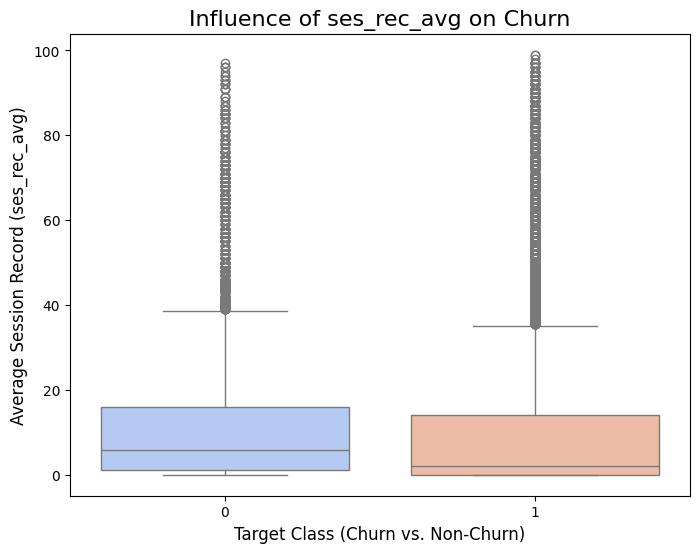

<ipython-input-63-2309943565dd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_class', y='rev_sum', data=df, palette='coolwarm')


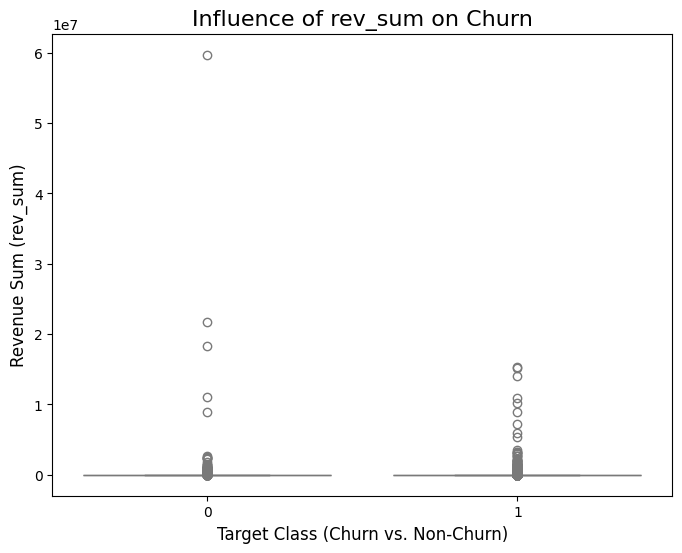

In [ ]:
# Visualizing the distribution of 'ses_rec_avg' based on target_class (Churn vs. Non-Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target_class', y='ses_rec_avg', data=df, palette='coolwarm')
plt.title('Influence of ses_rec_avg on Churn', fontsize=16)
plt.xlabel('Target Class (Churn vs. Non-Churn)', fontsize=12)
plt.ylabel('Average Session Record (ses_rec_avg)', fontsize=12)
plt.show()

# Visualizing the distribution of 'rev_sum' based on target_class (Churn vs. Non-Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target_class', y='rev_sum', data=df, palette='coolwarm')
plt.title('Influence of rev_sum on Churn', fontsize=16)
plt.xlabel('Target Class (Churn vs. Non-Churn)', fontsize=12)
plt.ylabel('Revenue Sum (rev_sum)', fontsize=12)
plt.show()


# **Model Building**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")



NameError: name 'X_train' is not defined

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


NameError: name 'X_train' is not defined

**Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Logistic Regression Evaluation
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Random Forest Evaluation
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.05      0.09      1079
           1       0.89      0.99      0.94      8793

    accuracy                           0.89      9872
   macro avg       0.70      0.52      0.52      9872
weighted avg       0.85      0.89      0.85      9872

Accuracy: 0.89
Confusion Matrix:
[[  53 1026]
 [  50 8743]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.10      0.17      1079
           1       0.90      0.99      0.94      8793

    accuracy                           0.90      9872
   macro avg       0.77      0.55      0.56      9872
weighted avg       0.87      0.90      0.86      9872

Accuracy: 0.90
Confusion Matrix:
[[ 108  971]
 [  62 8731]]


# **Feature Importance with Random Forest**

<ipython-input-24-d3fd32b59ee1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


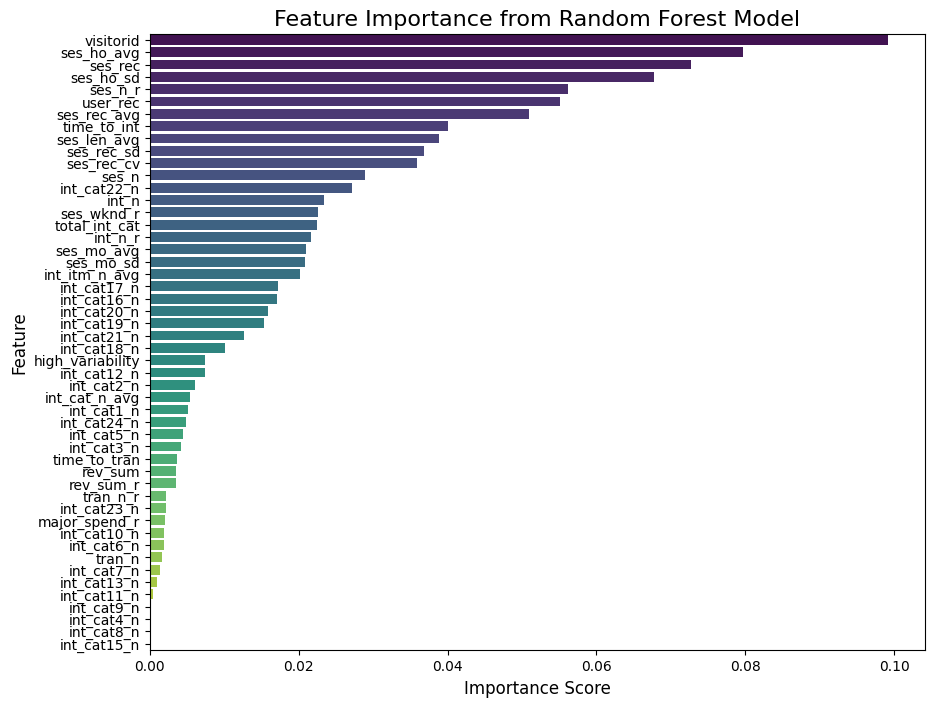

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming the dataset is already loaded as 'df'

# Define feature variables (X) and target variable (y)
X = df.drop('target_class', axis=1)  # Drop the target column to get the features
y = df['target_class']  # Target variable

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to display feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


**handle missing values**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/ecom-user-churn-data.csv")

# Check the columns to see if 'Tenure' and 'MonthlyCharges' exist
print(data.columns)

# Strip any extra spaces in column names
data.columns = data.columns.str.strip()

# Impute missing values for numerical features (adjust column names as needed)
num_imputer = SimpleImputer(strategy='median')

# You should replace these column names with actual ones if needed
data[['ses_rec', 'user_rec']] = num_imputer.fit_transform(data[['ses_rec', 'user_rec']])

# Impute missing values for categorical features (adjust column name if necessary)
cat_imputer = SimpleImputer(strategy='most_frequent')

# Here, I have replaced 'TotalCharges' with 'rev_sum', which is a valid column in your dataset
data['rev_sum'] = cat_imputer.fit_transform(data[['rev_sum']])

# Check the first few rows to ensure imputation worked
print(data.head())

# Identify numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", num_cols)


# Identify categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)



Index(['visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv',
       'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n',
       'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg',
       'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd',
       'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran',
       'int_cat1_n', 'int_cat2_n', 'int_cat3_n', 'int_cat4_n', 'int_cat5_n',
       'int_cat6_n', 'int_cat7_n', 'int_cat8_n', 'int_cat9_n', 'int_cat10_n',
       'int_cat11_n', 'int_cat12_n', 'int_cat13_n', 'int_cat15_n',
       'int_cat16_n', 'int_cat17_n', 'int_cat18_n', 'int_cat19_n',
       'int_cat20_n', 'int_cat21_n', 'int_cat22_n', 'int_cat23_n',
       'int_cat24_n', 'target_class'],
      dtype='object')
   visitorid  ses_rec  ses_rec_avg  ses_rec_sd  ses_rec_cv  user_rec  ses_n  \
0         89     23.0         16.0         0.0         0.0      39.0    2.0   
1        251     23.0         61.0         0.0         0.0  

In [ ]:
import numpy as np
from scipy.stats import zscore

# Choose valid columns for outlier detection
# Replace 'Tenure', 'MonthlyCharges', 'TotalCharges' with the columns present in your dataset
valid_columns = ['ses_rec', 'user_rec', 'rev_sum']  # Adjust this to valid columns

# Detecting outliers using Z-score
z_scores = np.abs(zscore(data[valid_columns]))

# Threshold for Z-score
threshold = 3
outliers = np.where(z_scores > threshold)
print(f"Outliers found at indices: {outliers}")

# Capping outliers for one of the columns (e.g., 'rev_sum')
# You can adjust the column and capping strategy as per your dataset
data['rev_sum'] = np.where(data['rev_sum'] > data['rev_sum'].quantile(0.95),
                            data['rev_sum'].quantile(0.95), data['rev_sum'])

# Verify the changes
print(data[valid_columns].head())


Outliers found at indices: (array([  453,   774,  3640,  4809,  4989,  5066,  5318,  5633,  5976,
        6479,  6769,  8474,  8552,  8760,  9083,  9885, 10489, 12179,
       13186, 13276, 14430, 15643, 15828, 16306, 16981, 19156, 19401,
       19991, 20652, 20786, 21052, 23488, 25020, 25123, 25760, 26483,
       26775, 28472, 28722, 28900, 29106, 30059, 31599, 31605, 31798,
       33278, 34681, 36212, 37017, 38590, 39118, 40079, 40757, 42697,
       43473, 43917, 44957, 45090, 45498, 45772, 47114, 47127, 47413,
       47429, 48897, 49123]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))
   ses_rec  user_rec  rev_sum
0     23.0      39.0      0.0
1     23.0      85.0      0.0
2     14.0      21.0      0.0
3     11.0      24.0      0.0
4     16.0      43.0      0.0


**Churn vs. Non-Churn Class Distribution**

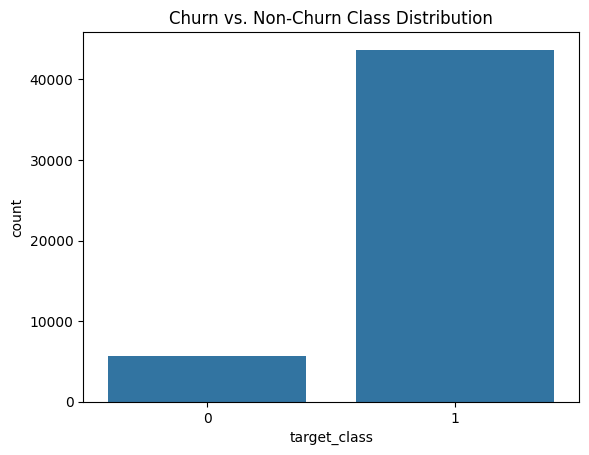

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x='target_class', data=data)
plt.title('Churn vs. Non-Churn Class Distribution')
plt.show()


# **The distribution of numerical features, handling missing data, and feature engineering. Below is an overview of 10 different types of graphs**

**Distribution of ses_rec**

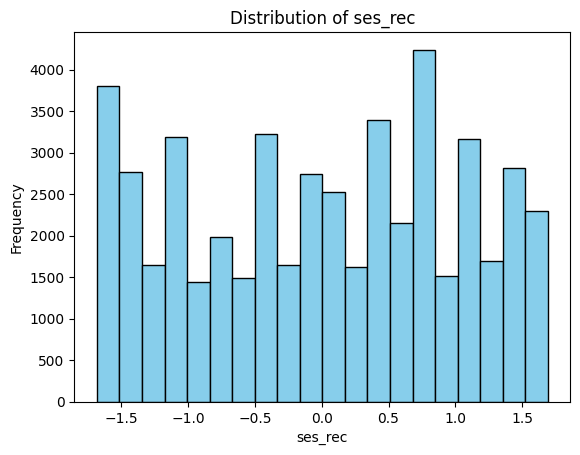

In [ ]:
plt.hist(data['ses_rec'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of ses_rec')
plt.xlabel('ses_rec')
plt.ylabel('Frequency')
plt.show()


**Box Plot of ses_rec by Target Class'**

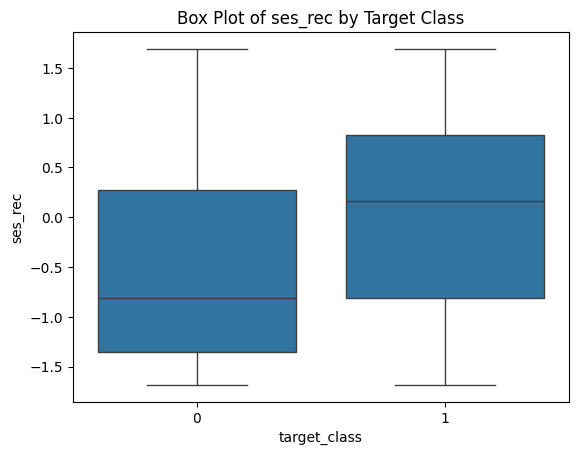

In [ ]:
import seaborn as sns

sns.boxplot(x='target_class', y='ses_rec', data=data)
plt.title('Box Plot of ses_rec by Target Class')
plt.show()


**Correlation Heatmap of Numerical Features**

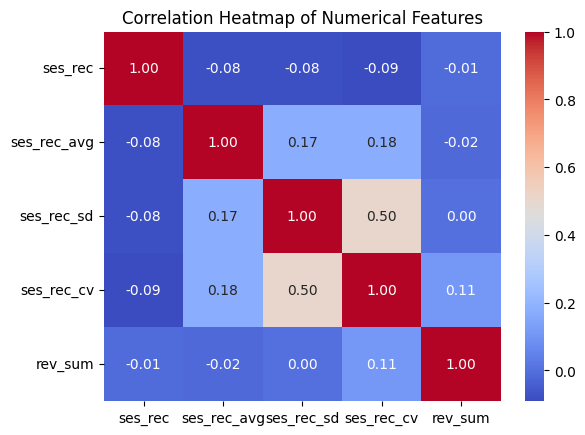

In [ ]:
import seaborn as sns

correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Missing Data Bar Plot**

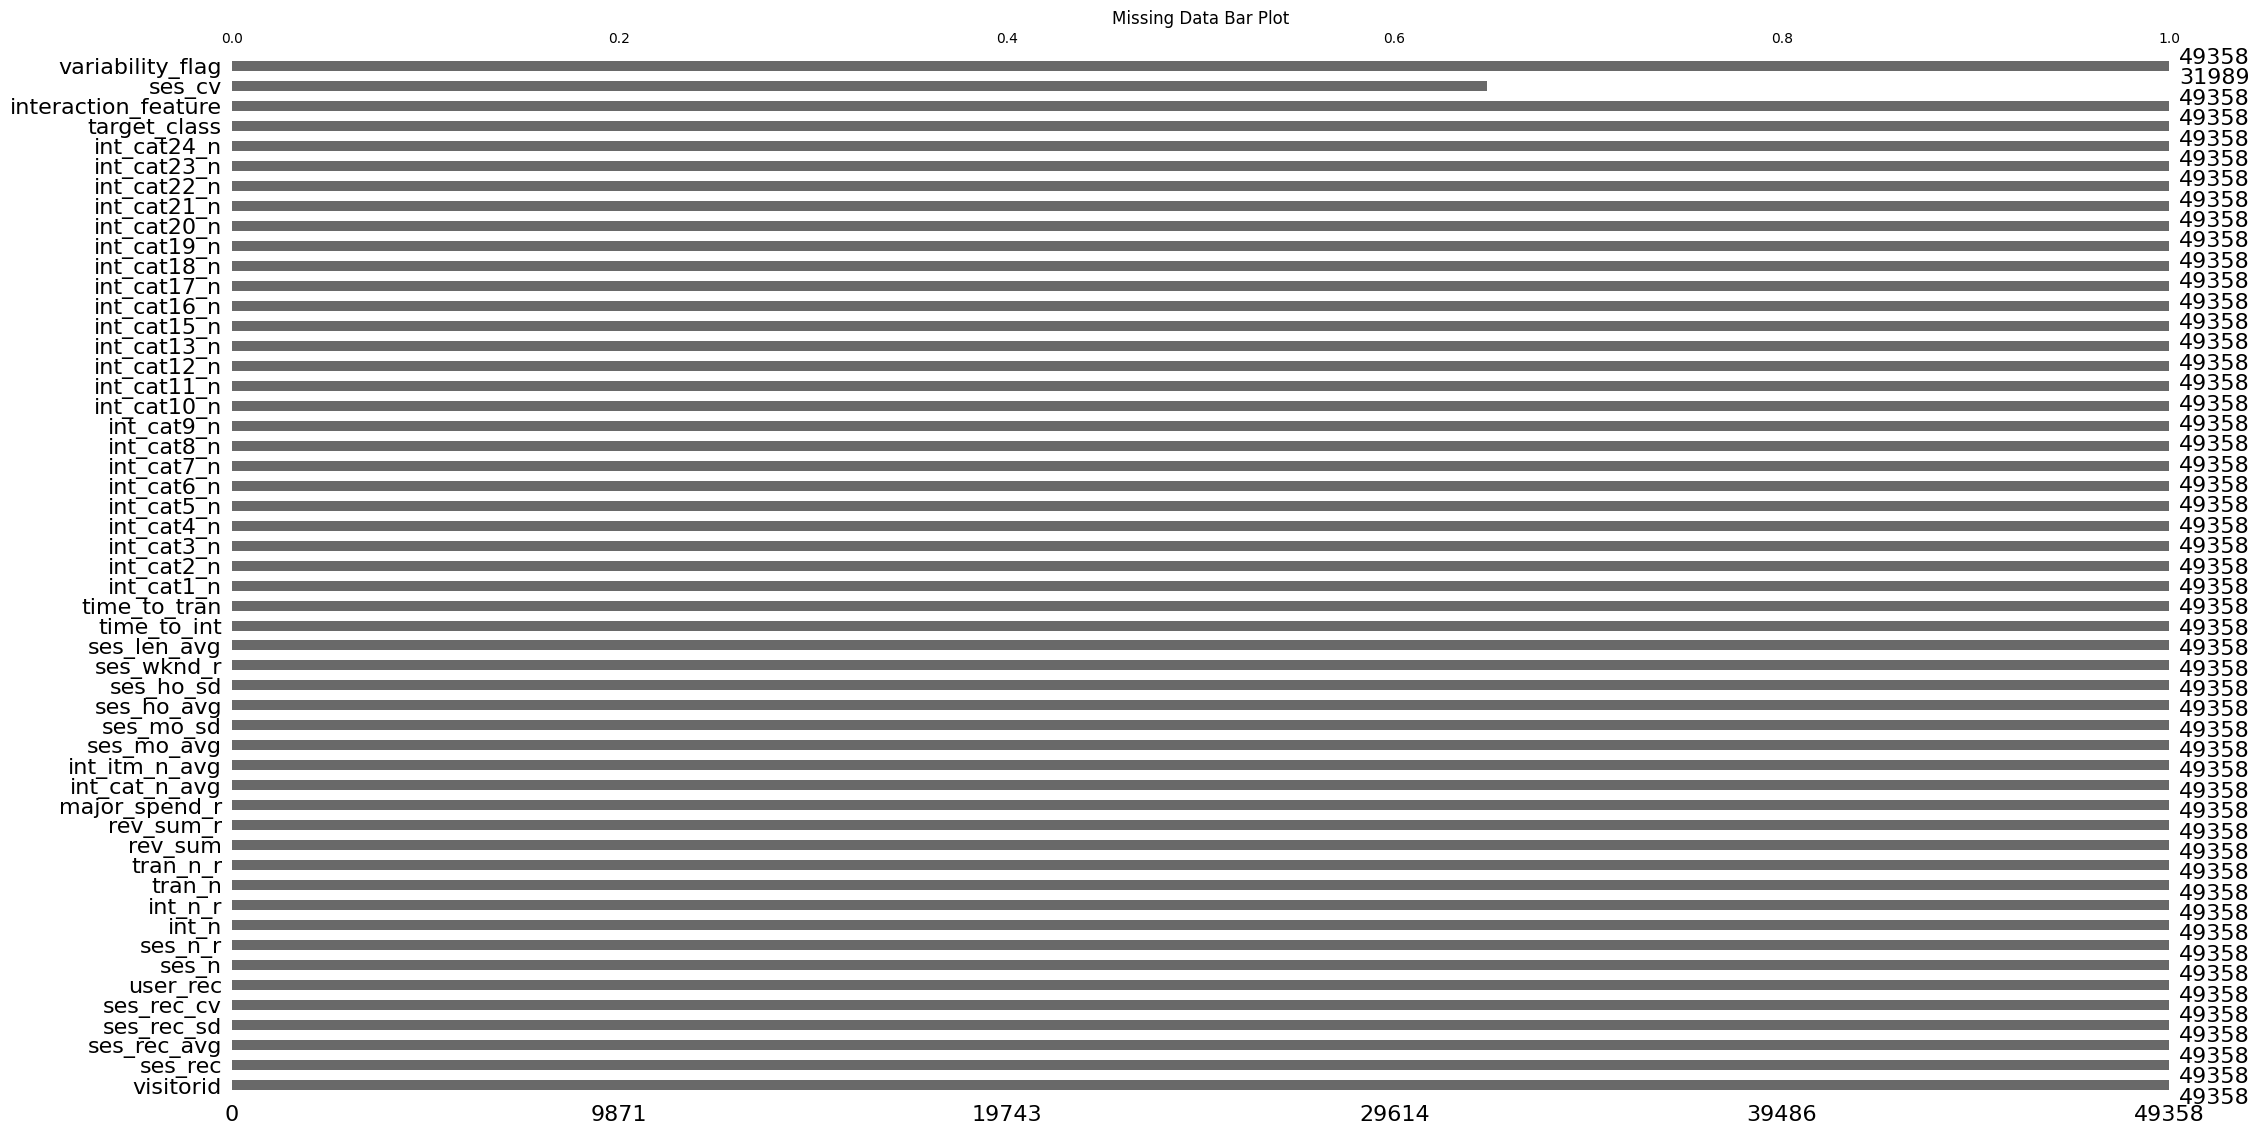

In [ ]:
import missingno as msno

msno.bar(data)
plt.title('Missing Data Bar Plot')
plt.show()


**Encoded User Rec Category Count**

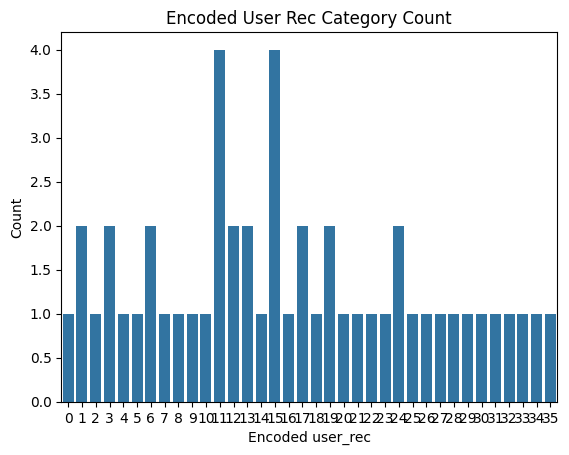

In [ ]:
# Select the first 100 rows from the data
data_subset = data.head(50)

# Encode the 'user_rec' column
encoded_user_rec = encoder.fit_transform(data_subset['user_rec'])

# Plot the count of encoded 'user_rec'
sns.countplot(x=encoded_user_rec)
plt.title('Encoded User Rec Category Count')
plt.xlabel('Encoded user_rec')
plt.ylabel('Count')
plt.show()


**Violin Plot of rev_sum by Encoded user_rec**

<ipython-input-43-b3dc9240615d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=encoded_user_rec, y=data_subset['rev_sum'], palette='muted')


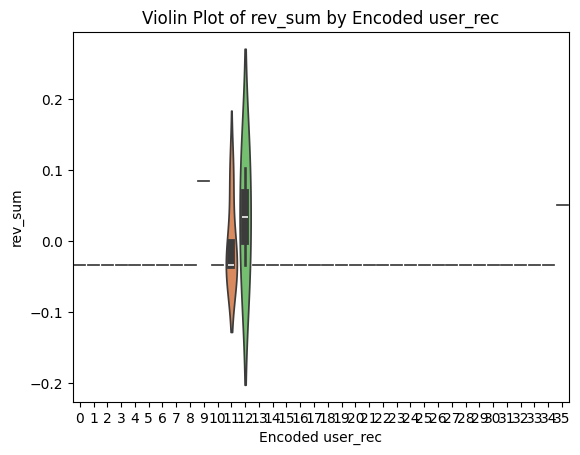

In [ ]:
# Select the first 100 rows of the data for both columns
data_subset = data.head(50)

# Encode the 'user_rec' column from the first 100 rows
encoded_user_rec = encoder.fit_transform(data_subset['user_rec'])

# Create the violin plot
sns.violinplot(x=encoded_user_rec, y=data_subset['rev_sum'], palette='muted')
plt.title('Violin Plot of rev_sum by Encoded user_rec')
plt.xlabel('Encoded user_rec')
plt.ylabel('rev_sum')
plt.show()


**Pair Plot of Numerical Features**

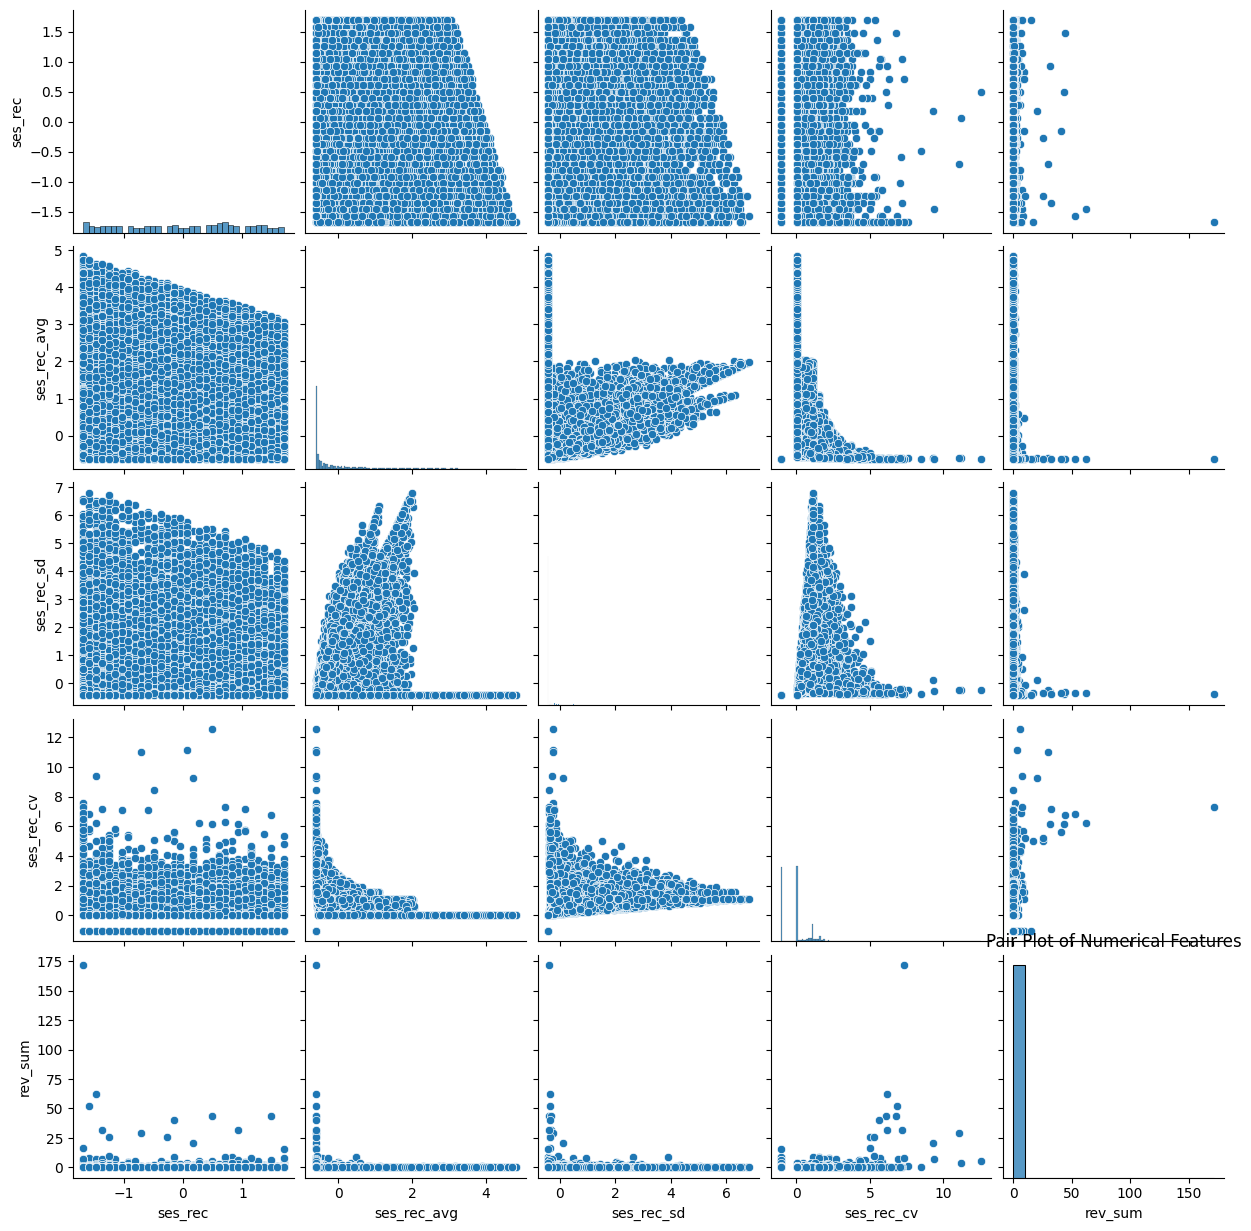

In [ ]:
sns.pairplot(data[numerical_cols], height=2.5)
plt.title('Pair Plot of Numerical Features')
plt.show()


**Bar Plot of Interaction Feature**

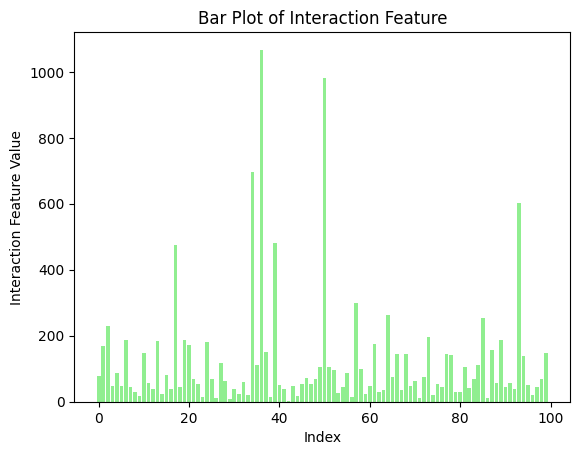

In [ ]:
# Select the first 100 rows of the dataset
data_subset = data.head(100)

# Create the bar plot using the 'interaction_feature' column
plt.bar(data_subset.index, data_subset['interaction_feature'], color='lightgreen')
plt.title('Bar Plot of Interaction Feature')
plt.xlabel('Index')
plt.ylabel('Interaction Feature Value')
plt.show()


**Time Series Plot of ses_mo_avg**

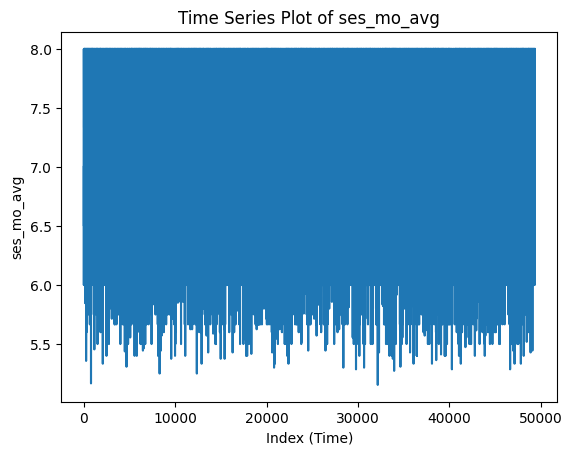

In [ ]:
plt.plot(data['ses_mo_avg'])
plt.title('Time Series Plot of ses_mo_avg')
plt.xlabel('Index (Time)')
plt.ylabel('ses_mo_avg')
plt.show()


**Scatter Plot of ses_rec_avg vs rev_sum**

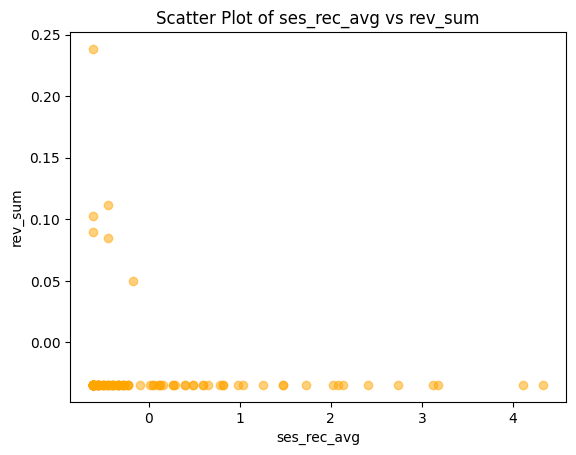

In [ ]:
# Select the first 100 rows of the dataset
data_subset = data.head(100)

# Create the scatter plot using 'ses_rec_avg' and 'rev_sum'
plt.scatter(data_subset['ses_rec_avg'], data_subset['rev_sum'], alpha=0.5, color='orange')
plt.title('Scatter Plot of ses_rec_avg vs rev_sum')
plt.xlabel('ses_rec_avg')
plt.ylabel('rev_sum')
plt.show()


**Initialize and train the Logistic Regression model**

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.09      0.16      1633
           1       0.90      0.99      0.94     13175

    accuracy                           0.89     14808
   macro avg       0.75      0.54      0.55     14808
weighted avg       0.87      0.89      0.86     14808

Accuracy: 0.89


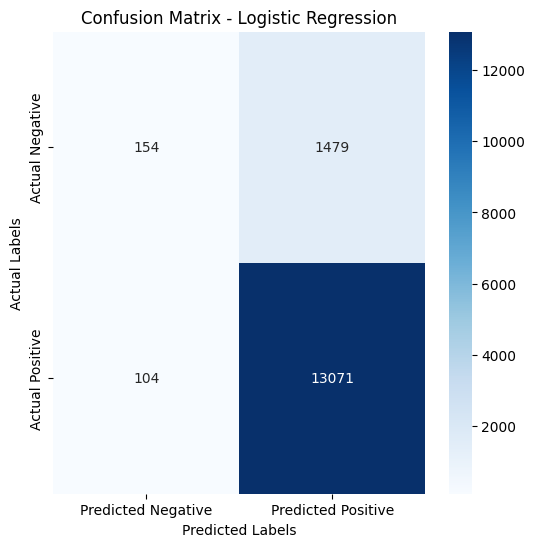

              precision    recall  f1-score       support
0              0.596899  0.094305  0.162877   1633.000000
1              0.898351  0.992106  0.942904  13175.000000
accuracy       0.893098  0.893098  0.893098      0.893098
macro avg      0.747625  0.543206  0.552890  14808.000000
weighted avg   0.865107  0.893098  0.856884  14808.000000
Accuracy Score: 0.89


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Example dataset loading (use your own dataset here)
# Assuming you have a dataset in a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Dataset/ecom-user-churn-data.csv")  # Replace with your dataset file

# Assuming your target column is 'target_class' and the rest are features
X = data.drop(columns=['target_class'])
y = data['target_class']

# Splitting dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optional: Scaling numerical features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# Classification Report
# This will be printed to the console but can be converted to a DataFrame for better readability
report = classification_report(y_test, y_pred_log_reg, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy Score: {accuracy:.2f}")


# **Here different Visualization of Model**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


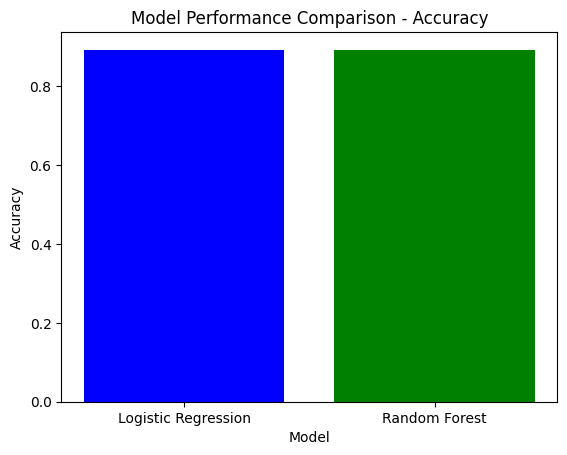

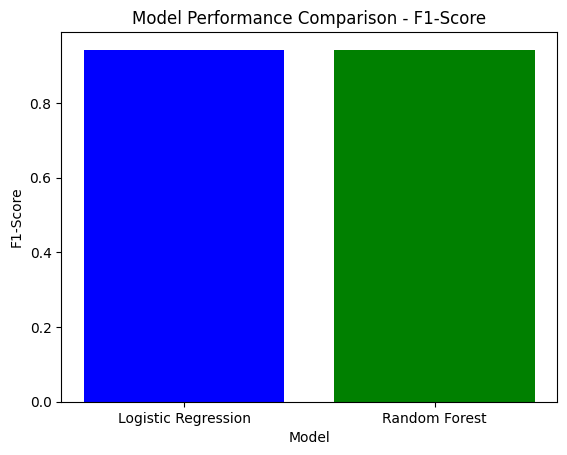

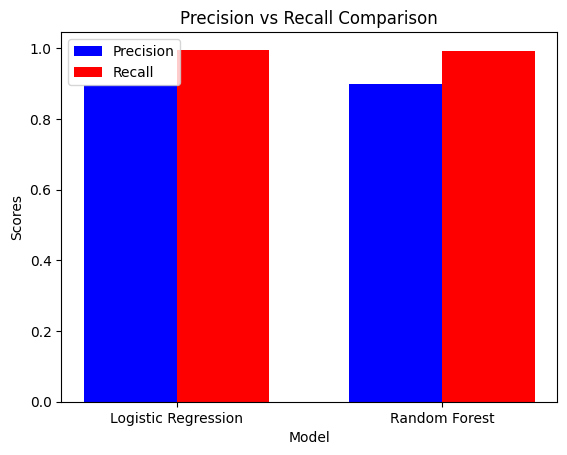

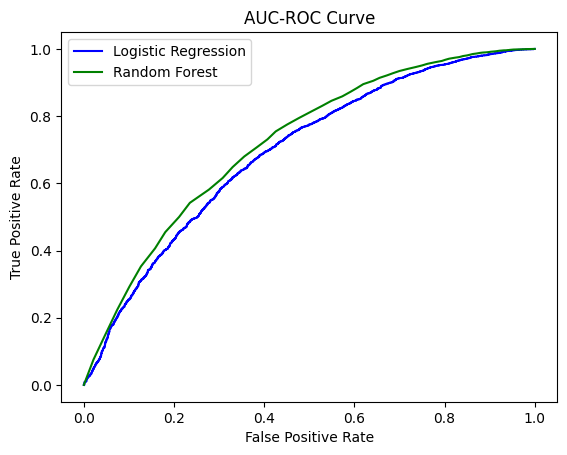

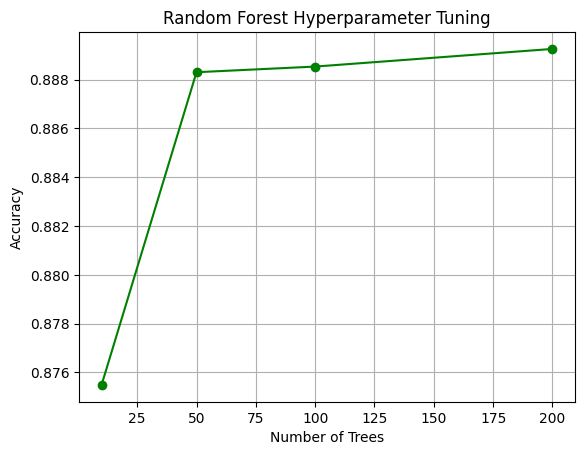

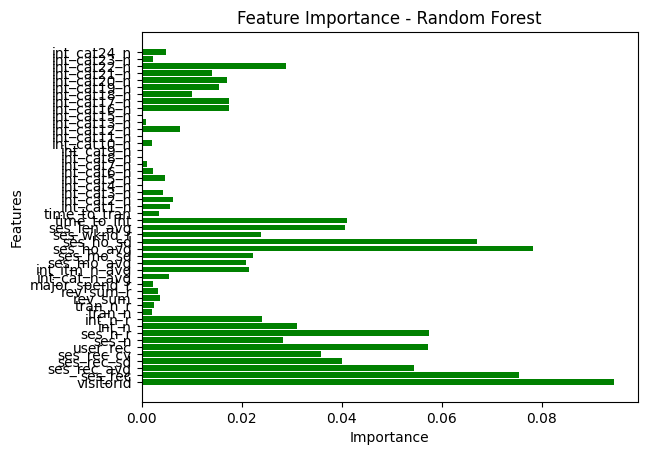

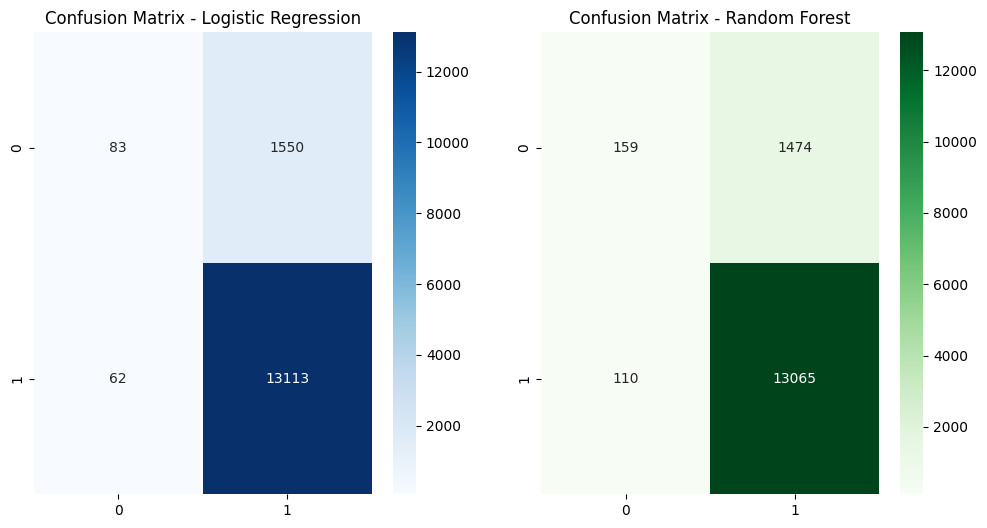

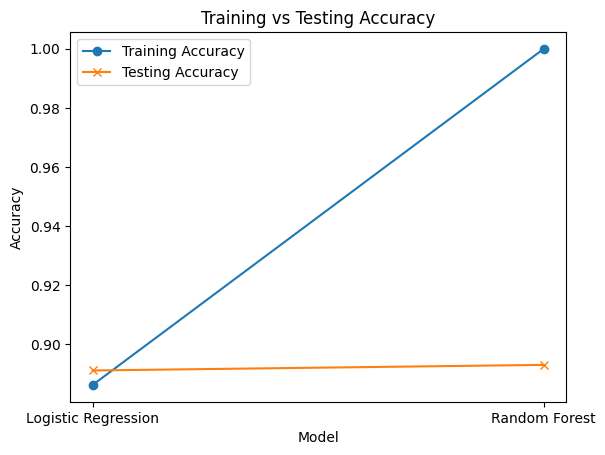

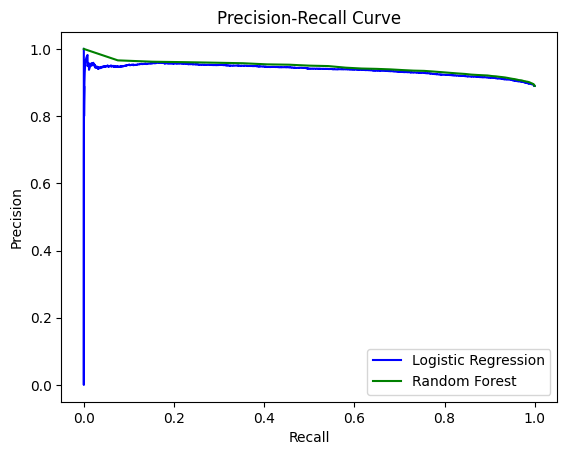

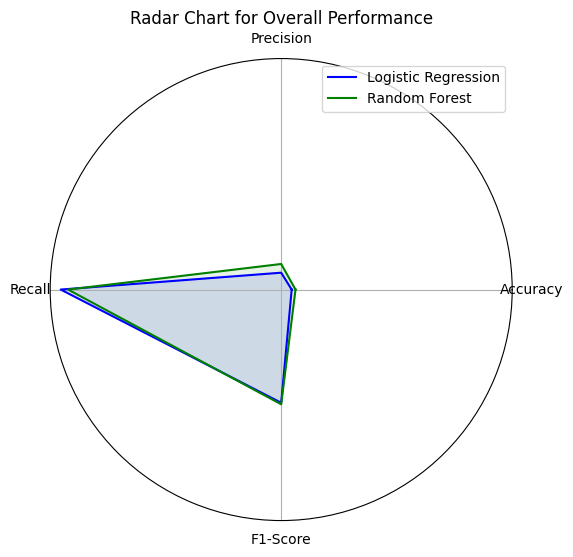

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/ecom-user-churn-data.csv")  # Replace with your actual dataset path

# Preprocessing (Adjust based on your dataset)
X = data.drop('target_class', axis=1)  # Replace 'target' with your actual target column name
y = data['target_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Probabilities for ROC and PR curves
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest': accuracy_score(y_test, y_pred_rf)
}
precision = {
    'Logistic Regression': precision_score(y_test, y_pred_lr),
    'Random Forest': precision_score(y_test, y_pred_rf)
}
recall = {
    'Logistic Regression': recall_score(y_test, y_pred_lr),
    'Random Forest': recall_score(y_test, y_pred_rf)
}
f1 = {
    'Logistic Regression': f1_score(y_test, y_pred_lr),
    'Random Forest': f1_score(y_test, y_pred_rf)
}

# Feature Importance
feature_importance = rf.feature_importances_

# Visualization 1: Accuracy Comparison
plt.bar(accuracy.keys(), accuracy.values(), color=['blue', 'green'])
plt.title('Model Performance Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Visualization 2: F1-Score Comparison
plt.bar(f1.keys(), f1.values(), color=['blue', 'green'])
plt.title('Model Performance Comparison - F1-Score')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.show()

# Visualization 3: Precision vs Recall
width = 0.35
x = np.arange(len(precision))
plt.bar(x - width/2, precision.values(), width, label='Precision', color='blue')
plt.bar(x + width/2, recall.values(), width, label='Recall', color='red')
plt.xticks(x, precision.keys())
plt.title('Precision vs Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Visualization 4: AUC-ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression', color='blue')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='green')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Visualization 5: Hyperparameter Tuning (Random Forest)
param_grid = {'n_estimators': [10, 50, 100, 200]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_['mean_test_score']
plt.plot(param_grid['n_estimators'], results, marker='o', color='green')
plt.title('Random Forest Hyperparameter Tuning')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Visualization 6: Feature Importance
features = X.columns
plt.barh(features, feature_importance, color='green')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualization 7: Confusion Matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
plt.show()

# Visualization 8: Training vs Testing Accuracy
training_accuracy = [log_reg.score(X_train, y_train), rf.score(X_train, y_train)]
testing_accuracy = list(accuracy.values())
plt.plot(accuracy.keys(), training_accuracy, label='Training Accuracy', marker='o')
plt.plot(accuracy.keys(), testing_accuracy, label='Testing Accuracy', marker='x')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualization 9: Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(recall_lr, precision_lr, label='Logistic Regression', color='blue')
plt.plot(recall_rf, precision_rf, label='Random Forest', color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Visualization 10: Radar Chart for Overall Performance
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logistic_scores = [accuracy['Logistic Regression'], precision['Logistic Regression'], recall['Logistic Regression'], f1['Logistic Regression']]
random_forest_scores = [accuracy['Random Forest'], precision['Random Forest'], recall['Random Forest'], f1['Random Forest']]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
logistic_scores += logistic_scores[:1]
random_forest_scores += random_forest_scores[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, logistic_scores, label='Logistic Regression', color='blue')
ax.fill(angles, logistic_scores, color='blue', alpha=0.1)
ax.plot(angles, random_forest_scores, label='Random Forest', color='green')
ax.fill(angles, random_forest_scores, color='green', alpha=0.1)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend()
plt.title('Radar Chart for Overall Performance')
plt.show()
